<a href="https://colab.research.google.com/github/deralph/Diabetes-prediction-model/blob/main/GestationalDiabete2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
diabetes_data= pd.read_excel('Gestational Diabetic Dat Set.xlsx')

In [ ]:
diabetes_data.head()

,Case Number,Age,No of Pregnancy,Gestation in previous Pregnancy,BMI,HDL,Family History,unexplained prenetal loss,Large Child or Birth Default,PCOS,Sys BP,Dia BP,OGTT,Hemoglobin,Sedentary Lifestyle,Prediabetes,Class Label(GDM /Non GDM)
0,1,22,2,1,NaN,55.0,0,0,0,0,102.0,69,NaN,12.0,0,0,0
1,2,26,2,1,NaN,53.0,0,0,0,0,101.0,63,NaN,12.4,0,0,0
2,3,29,1,0,NaN,50.0,0,0,0,0,118.0,79,NaN,14.3,0,0,0
3,4,28,2,1,NaN,51.0,0,0,0,0,99.0,70,NaN,15.0,0,0,0
4,5,21,2,1,NaN,52.0,0,0,0,0,116.0,65,NaN,15.0,0,0,0


In [ ]:
diabetes_data.shape

(3525, 17)

In [ ]:
diabetes_data['Gestation in previous Pregnancy'].value_counts()

Gestation in previous Pregnancy
1    1681
0     991
2     853
Name: count, dtype: int64

In [ ]:
diabetes_data['No of Pregnancy'].value_counts()

No of Pregnancy
2    1506
1     955
3     904
4     160
Name: count, dtype: int64

In [ ]:
diabetes_data.rename(columns={'Class Label(GDM /Non GDM)':'Prediction','Family History':'Heredity',},inplace=True)


In [ ]:
diabetes_data.head()

,Case Number,Age,No of Pregnancy,Gestation in previous Pregnancy,BMI,HDL,Heredity,unexplained prenetal loss,Large Child or Birth Default,PCOS,Sys BP,Dia BP,OGTT,Hemoglobin,Sedentary Lifestyle,Prediabetes,Prediction
0,1,22,2,1,NaN,55.0,0,0,0,0,102.0,69,NaN,12.0,0,0,0
1,2,26,2,1,NaN,53.0,0,0,0,0,101.0,63,NaN,12.4,0,0,0
2,3,29,1,0,NaN,50.0,0,0,0,0,118.0,79,NaN,14.3,0,0,0
3,4,28,2,1,NaN,51.0,0,0,0,0,99.0,70,NaN,15.0,0,0,0
4,5,21,2,1,NaN,52.0,0,0,0,0,116.0,65,NaN,15.0,0,0,0


In [ ]:
diabetes_data.isna().sum().sort_values()

Case Number                           0
Sedentary Lifestyle                   0
Hemoglobin                            0
Dia BP                                0
PCOS                                  0
Prediabetes                           0
unexplained prenetal loss             0
Large Child or Birth Default          0
Gestation in previous Pregnancy       0
No of Pregnancy                       0
Age                                   0
Heredity                              0
Prediction                            0
OGTT                                513
HDL                                1001
BMI                                1081
Sys BP                             1705
dtype: int64

In [ ]:
diabetes_data.describe()

,Case Number,Age,No of Pregnancy,Gestation in previous Pregnancy,BMI,HDL,Heredity,unexplained prenetal loss,Large Child or Birth Default,PCOS,Sys BP,Dia BP,OGTT,Hemoglobin,Sedentary Lifestyle,Prediabetes,Prediction
count,3525.000000,3525.000000,3525.000000,3525.000000,2444.000000,2524.000000,3525.000000,3525.000000,3525.00000,3525.000000,1820.000000,3525.000000,3012.000000,3525.000000,3525.000000,3525.000000,3525.000000
mean,1763.000000,32.581277,2.076312,0.960851,27.854092,46.471870,0.498156,0.364823,0.35773,0.264681,135.762088,81.538156,170.707503,13.959801,0.449645,0.293050,0.389220
std,1017.724177,6.169107,0.838637,0.722313,5.714737,10.800813,0.500068,0.481449,0.47940,0.441226,22.742844,11.379758,48.160549,1.863969,0.497529,0.455226,0.487643
min,1.000000,20.000000,1.000000,0.000000,13.300000,15.000000,0.000000,0.000000,0.00000,0.000000,90.000000,60.000000,80.000000,8.800000,0.000000,0.000000,0.000000
25%,882.000000,28.000000,1.000000,0.000000,24.400000,42.000000,0.000000,0.000000,0.00000,0.000000,122.000000,74.000000,142.000000,12.700000,0.000000,0.000000,0.000000
50%,1763.000000,32.000000,2.000000,1.000000,27.500000,49.000000,0.000000,0.000000,0.00000,0.000000,132.000000,81.000000,156.000000,14.000000,0.000000,0.000000,0.000000
75%,2644.000000,37.000000,3.000000,1.000000,31.000000,55.000000,1.000000,1.000000,1.00000,1.000000,153.000000,86.000000,195.000000,15.000000,1.000000,1.000000,1.000000
max,3525.000000,45.000000,4.000000,2.000000,45.000000,70.000000,1.000000,1.000000,1.00000,1.000000,185.000000,124.000000,403.000000,18.000000,1.000000,1.000000,1.000000


In [ ]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
diabetes_data_imputed = imputer.fit_transform(diabetes_data)
diabetes_data = pd.DataFrame(diabetes_data_imputed, columns=diabetes_data.columns)


In [ ]:
diabetes_data.shape

(3525, 17)

In [ ]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3525 entries, 0 to 3524
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Case Number                      3525 non-null   float64
 1   Age                              3525 non-null   float64
 2   No of Pregnancy                  3525 non-null   float64
 3   Gestation in previous Pregnancy  3525 non-null   float64
 4   BMI                              3525 non-null   float64
 5   HDL                              3525 non-null   float64
 6   Heredity                         3525 non-null   float64
 7   unexplained prenetal loss        3525 non-null   float64
 8   Large Child or Birth Default     3525 non-null   float64
 9   PCOS                             3525 non-null   float64
 10  Sys BP                           3525 non-null   float64
 11  Dia BP                           3525 non-null   float64
 12  OGTT                

In [ ]:
diabetes_data.describe()

,Case Number,Age,No of Pregnancy,Gestation in previous Pregnancy,BMI,HDL,Heredity,unexplained prenetal loss,Large Child or Birth Default,PCOS,Sys BP,Dia BP,OGTT,Hemoglobin,Sedentary Lifestyle,Prediabetes,Prediction
count,3525.000000,3525.000000,3525.000000,3525.000000,3525.000000,3525.000000,3525.000000,3525.000000,3525.00000,3525.000000,3525.000000,3525.000000,3525.000000,3525.000000,3525.000000,3525.000000,3525.000000
mean,1763.000000,32.581277,2.076312,0.960851,27.218184,44.863773,0.498156,0.364823,0.35773,0.264681,140.558922,81.538156,165.857418,13.959801,0.449645,0.293050,0.389220
std,1017.724177,6.169107,0.838637,0.722313,4.853326,11.160512,0.500068,0.481449,0.47940,0.441226,21.562756,11.379758,46.043205,1.863969,0.497529,0.455226,0.487643
min,1.000000,20.000000,1.000000,0.000000,13.300000,15.000000,0.000000,0.000000,0.00000,0.000000,90.000000,60.000000,80.000000,8.800000,0.000000,0.000000,0.000000
25%,882.000000,28.000000,1.000000,0.000000,25.780000,33.000000,0.000000,0.000000,0.00000,0.000000,127.000000,74.000000,137.400000,12.700000,0.000000,0.000000,0.000000
50%,1763.000000,32.000000,2.000000,1.000000,25.780000,49.000000,0.000000,0.000000,0.00000,0.000000,132.000000,81.000000,154.000000,14.000000,0.000000,0.000000,0.000000
75%,2644.000000,37.000000,3.000000,1.000000,29.600000,52.600000,1.000000,1.000000,1.00000,1.000000,165.000000,86.000000,184.000000,15.000000,1.000000,1.000000,1.000000
max,3525.000000,45.000000,4.000000,2.000000,45.000000,70.000000,1.000000,1.000000,1.00000,1.000000,185.000000,124.000000,403.000000,18.000000,1.000000,1.000000,1.000000


In [ ]:
diabetes_data['Prediction'].value_counts()

Prediction
0.0    2153
1.0    1372
Name: count, dtype: int64

In [ ]:
diabetes_data.drop('Case Number',axis=1,inplace=True)

In [ ]:
def prediction_bar_chart(column_name, title, xlabel, ylabel, legend_title):
  ax=pd.crosstab( diabetes_data['Prediction'],diabetes_data[column_name]).plot(kind='bar', stacked=False)
  ax.set_xticklabels(['Non GDM','GDM'],rotation=0)
  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.legend(title=legend_title,labels=["Negative","Positive"])
  plt.show()


[Text(0, 0, 'Non GDM'), Text(1, 0, 'GDM')]

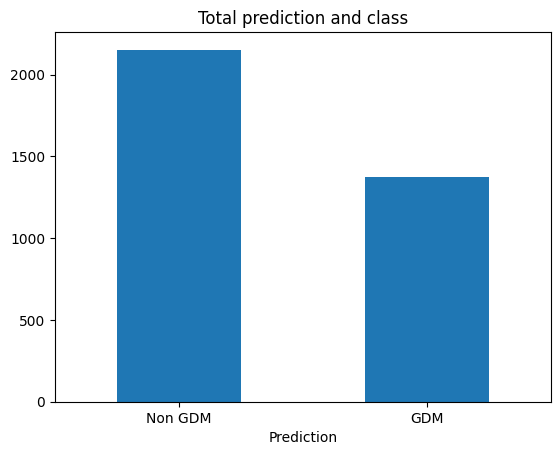

In [ ]:
ax=diabetes_data['Prediction'].value_counts().plot(kind='bar',title='Total prediction and class')
ax.set_xticklabels(['Non GDM','GDM'],rotation=0)

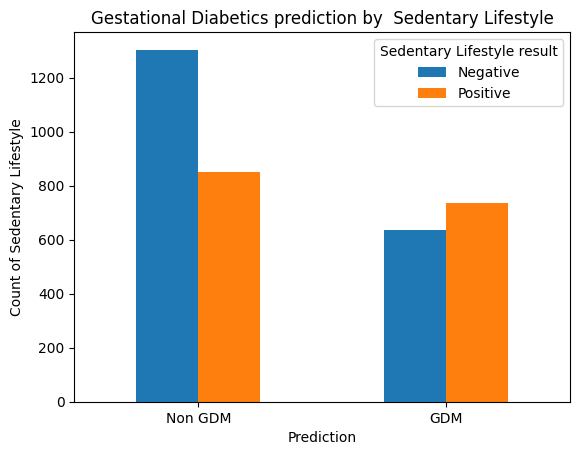

In [ ]:


prediction_bar_chart('Sedentary Lifestyle','Gestational Diabetics prediction by  Sedentary Lifestyle','Prediction','Count of Sedentary Lifestyle','Sedentary Lifestyle result')

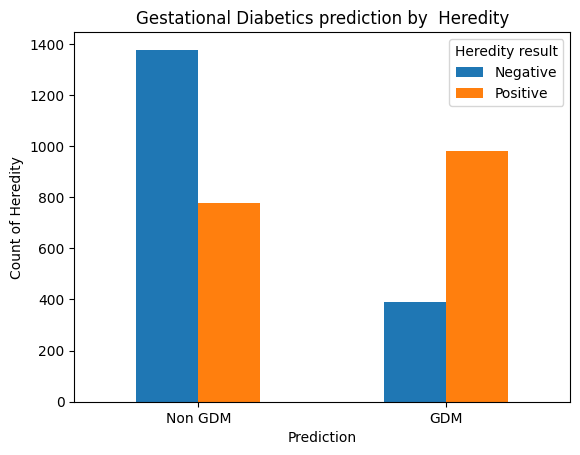

In [ ]:


prediction_bar_chart( 'Heredity','Gestational Diabetics prediction by  Heredity','Prediction','Count of Heredity','Heredity result')

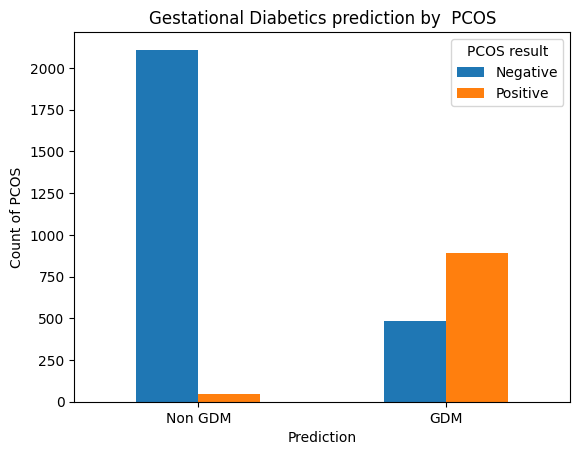

In [ ]:


prediction_bar_chart( 'PCOS','Gestational Diabetics prediction by  PCOS','Prediction','Count of PCOS','PCOS result')

<Axes: >

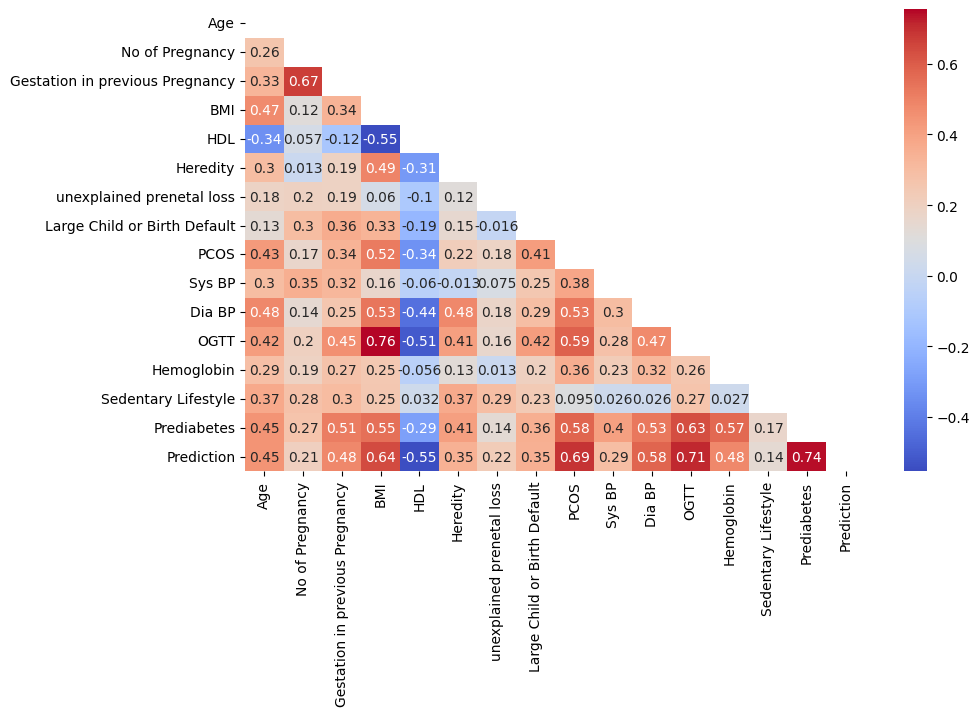

In [ ]:
plt.figure(figsize=(10,6))
mask = np.triu(np.ones_like(diabetes_data.corr(), dtype = bool))
sns.heatmap(diabetes_data.corr(),annot=True,cmap='coolwarm',mask=mask)

In [ ]:
X= diabetes_data.drop('Prediction', axis=1)
y= diabetes_data['Prediction']

In [ ]:
from sklearn.model_selection import train_test_split,learning_curve,StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [ ]:
# model=LogisticRegression(solver='liblinear')
# model=LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# model.fit(X_train,y_train)
# y_pred=model.predict(X_test)

# model.score(X_test,y_test)
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(solver='saga', max_iter=1000))
])

# Fit the model
pipeline.fit(X_train, y_train)

# Evaluate the model
accuracy = pipeline.score(X_test, y_test)

train_accuracy = pipeline.score(X_train, y_train)

print(f'Accuracy: {accuracy}')
print(f'Training Accuracy: {accuracy}')

Accuracy: 0.9744680851063829
Training Accuracy: 0.9744680851063829


In [ ]:
# model.score(X_train,y_train)

In [ ]:
y_pred = pipeline.predict(X_test)


In [ ]:
confusion_matrix(y_test,y_pred)

array([[437,  11],
       [  7, 250]])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       448
         1.0       0.96      0.97      0.97       257

    accuracy                           0.97       705
   macro avg       0.97      0.97      0.97       705
weighted avg       0.97      0.97      0.97       705



In [ ]:
y_test.value_counts()

Prediction
0.0    448
1.0    257
Name: count, dtype: int64

In [ ]:
diabetes_data.columns

Index(['Age', 'No of Pregnancy', 'Gestation in previous Pregnancy', 'BMI',
       'HDL', 'Heredity', 'unexplained prenetal loss',
       'Large Child or Birth Default', 'PCOS', 'Sys BP', 'Dia BP', 'OGTT',
       'Hemoglobin', 'Sedentary Lifestyle', 'Prediabetes', 'Prediction'],
      dtype='object')

In [ ]:
y_pred_prob = pipeline.predict_proba(X_test)[:,1]

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

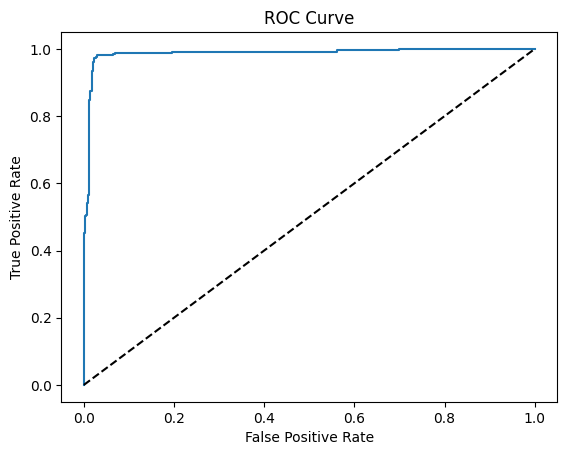

In [ ]:
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [ ]:
roc_auc_score(y_test, y_pred_prob)

0.98763201778766

In [ ]:
def plot_learning_curve(estimator, title, X, y, cv=None, n_jobs=None, train_sizes=np.linspace(0.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='accuracy')

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

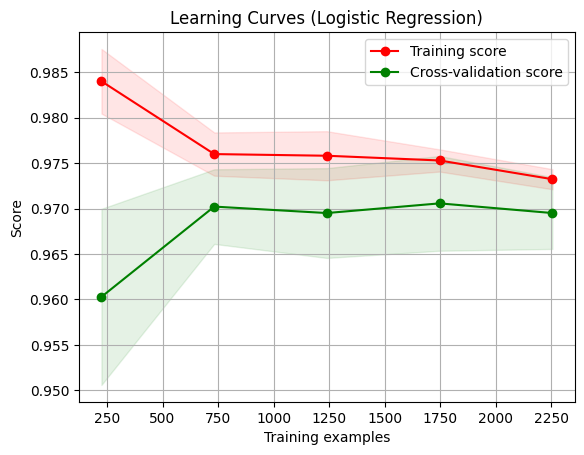

In [ ]:
plot_learning_curve(pipeline, "Learning Curves (Logistic Regression)", X_train, y_train, n_jobs=-1)

In [ ]:
# Access the trained LogisticRegression model coefficients
coeffiecients = pipeline.named_steps['logreg'].coef_[0]


feature_importances=pd.DataFrame({"coeficients":coeffiecients,"features":X.columns})
feature_importances

,coeficients,features
0,-0.174721,Age
1,-0.154434,No of Pregnancy
2,0.517256,Gestation in previous Pregnancy
3,0.283364,BMI
4,-1.020362,HDL
5,0.503966,Heredity
6,0.414777,unexplained prenetal loss
7,-0.318771,Large Child or Birth Default
8,1.354725,PCOS
9,0.006563,Sys BP


<Axes: title={'center': 'Features and their Importance'}, xlabel='coeficients', ylabel='features'>

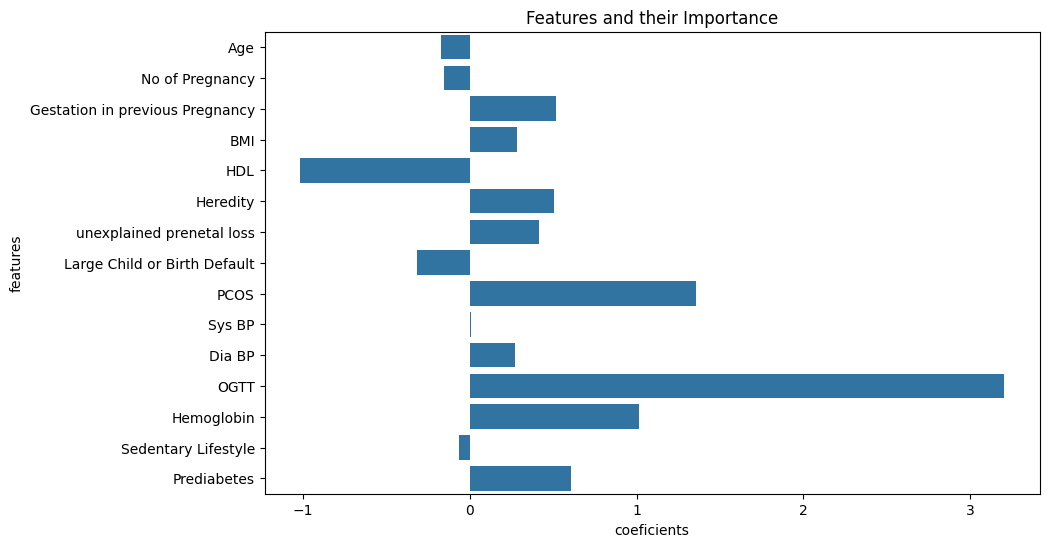

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Features and their Importance')
sns.barplot(x='coeficients',y='features',data=feature_importances)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Resampling strategies
oversample = SMOTE()
undersample = RandomUnderSampler()
steps = [('o', oversample), ('u', undersample)]
pipeline = Pipeline(steps=steps)

# Resample the training data
X_train_resampled, y_train_resampled = pipeline.fit_resample(X_train, y_train)

# Initialize classifiers with class weights
classifiers = {
    "Logistic Regression": LogisticRegression(class_weight='balanced',max_iter=10000),
    "Decision Tree": DecisionTreeClassifier(class_weight='balanced'),
    "Random Forest": RandomForestClassifier(class_weight='balanced'),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC(class_weight='balanced', probability=True),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Neural Network": MLPClassifier()
}

# Train and evaluate each classifier
for name, clf in classifiers.items():
    clf.fit(X_train_resampled, y_train_resampled)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"{name} - Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}")
    print(confusion_matrix(y_test, y_pred))



Logistic Regression - Accuracy: 0.97, Precision: 0.95, Recall: 0.98, F1 Score: 0.97
[[436  12]
 [  6 251]]
Decision Tree - Accuracy: 0.97, Precision: 0.96, Recall: 0.96, F1 Score: 0.96
[[438  10]
 [  9 248]]
Random Forest - Accuracy: 0.97, Precision: 0.94, Recall: 0.98, F1 Score: 0.96
[[433  15]
 [  4 253]]
Gradient Boosting - Accuracy: 0.97, Precision: 0.95, Recall: 0.96, F1 Score: 0.96
[[434  14]
 [  9 248]]
SVM - Accuracy: 0.97, Precision: 0.95, Recall: 0.97, F1 Score: 0.96
[[436  12]
 [  8 249]]
KNN - Accuracy: 0.97, Precision: 0.95, Recall: 0.97, F1 Score: 0.96
[[435  13]
 [  8 249]]
Naive Bayes - Accuracy: 0.96, Precision: 0.93, Recall: 0.95, F1 Score: 0.94
[[431  17]
 [ 14 243]]
Neural Network - Accuracy: 0.98, Precision: 0.96, Recall: 0.98, F1 Score: 0.97
[[437  11]
 [  5 252]]
